
# Mini-batch Gradient Descent

Mini-batch Gradient Descent is a variant of the gradient descent algorithm that splits the training dataset into small batches and performs an update for each of these batches. This approach provides a compromise between the robustness of stochastic gradient descent and the efficiency of batch gradient descent.


In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Some helper functions for plotting and drawing lines
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)


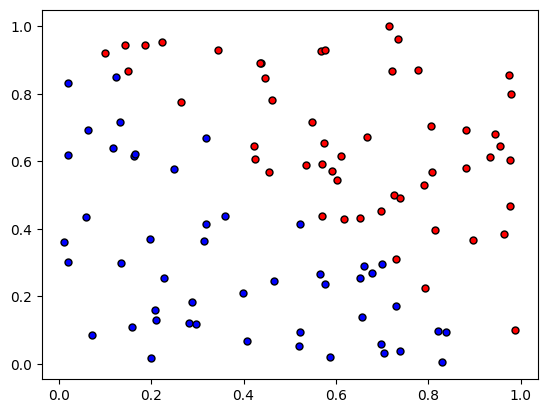

In [2]:

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.array([1 if x[0] + x[1] > 1 else 0 for x in X])
plot_points(X,y)
plt.show()



## Implementing Mini-batch Gradient Descent

In Mini-batch Gradient Descent, the update rule is applied for each mini-batch. The update rule is similar to batch gradient descent but applied on smaller subsets of the data.


In [3]:

# Activation (sigmoid) function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y*np.log(output) - (1 - y) * np.log(1-output)

# Mini-batch gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x,weights,bias)
    d_error = -(y-output)
    gradient = d_error * x
    weights -= learnrate * gradient
    bias -= learnrate * d_error
    return weights, bias


In [4]:

np.random.seed(44)

epochs = 100
learnrate = 0.01
batch_size = 20

def train(features, targets, epochs, learnrate, batch_size, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        indices = np.arange(n_records)
        np.random.shuffle(indices)
        for i in range(0, n_records, batch_size):
            batch_indices = indices[i:i + batch_size]
            x_batch = features[batch_indices]
            y_batch = targets[batch_indices]
            for x, y in zip(x_batch, y_batch):
                output = output_formula(x, weights, bias)
                error = error_formula(y, output)
                weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()



========== Epoch 0 ==========
Train loss:  0.6489274475909568
Accuracy:  0.67

========== Epoch 10 ==========
Train loss:  0.5847603170447185
Accuracy:  0.81

========== Epoch 20 ==========
Train loss:  0.5343016086067219
Accuracy:  0.84

========== Epoch 30 ==========
Train loss:  0.4937794390212804
Accuracy:  0.86

========== Epoch 40 ==========
Train loss:  0.4607781167619296
Accuracy:  0.88

========== Epoch 50 ==========
Train loss:  0.4334674071879166
Accuracy:  0.88

========== Epoch 60 ==========
Train loss:  0.4105526585712076
Accuracy:  0.89

========== Epoch 70 ==========
Train loss:  0.3910178880442255
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3742018360871016
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3595488327737077
Accuracy:  0.94


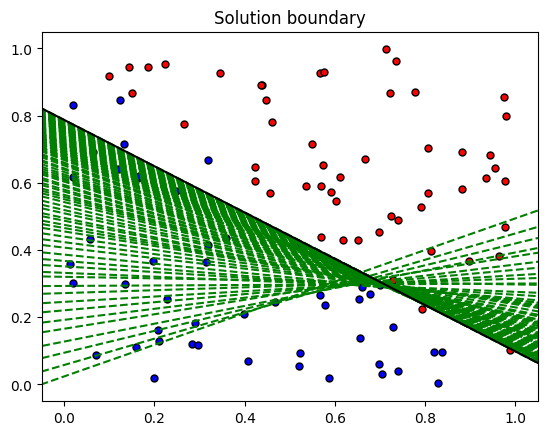

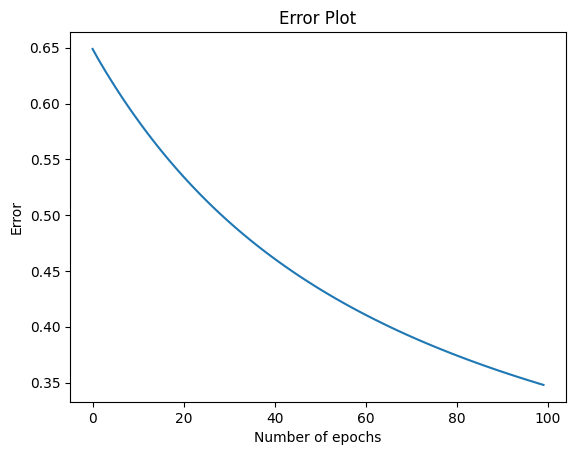

In [5]:

train(X, y, epochs, learnrate, batch_size, True)
